<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/%5B20241123%5D%20Bi-LSTM%20model%20for%2010%20Classes%20classification%20on%20UNSW-NB15%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bi-LSTM model for 10 Classes classification on UNSW-NB15 dataset**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
# Load dataset
dataset = pd.read_csv("Dataset_10Classes.csv")
dataset = dataset.dropna() # Remove missing values

In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 47 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID_Cb              257673 non-null  int64  
 1   id                 257673 non-null  int64  
 2   dur                257673 non-null  float64
 3   proto              257673 non-null  object 
 4   service            257673 non-null  object 
 5   state              257673 non-null  object 
 6   spkts              257673 non-null  int64  
 7   dpkts              257673 non-null  int64  
 8   sbytes             257673 non-null  int64  
 9   dbytes             257673 non-null  int64  
 10  rate               257673 non-null  float64
 11  sttl               257673 non-null  int64  
 12  dttl               257673 non-null  int64  
 13  sload              257673 non-null  float64
 14  dload              257673 non-null  float64
 15  sloss              257673 non-null  int64  
 16  dl

In [4]:
# Encode categorical features
categorical_columns = dataset.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le

# Split into features and target
X = dataset.drop('Class', axis=1).values
y = dataset['Class'].values

In [5]:
# Balance dataset using SMOTE
oversample = SMOTE(random_state=42)
X_resampled, y_resampled = oversample.fit_resample(X, y)

In [18]:
import collections as c
# Check class distribution after balancing
counter = c.Counter(y_resampled)
print("After SMOTE:", counter)

After SMOTE: Counter({0: 93000, 2: 93000, 1: 93000, 5: 93000, 8: 93000, 7: 93000, 4: 93000, 3: 93000, 9: 93000, 6: 93000})


In [19]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [20]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape features to 3D format for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])  # [samples, timesteps, features]
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])      # [samples, timesteps, features]

# Ensure target labels are properly one-hot encoded
num_classes = len(np.unique(y))  # Number of classes in the target
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [21]:
# Build the BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(32, activation='relu')))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))  # Number of classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='macro')
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

print(f"BiLSTM Accuracy: {accuracy:.10f}")
print(f"BiLSTM Precision: {precision:.10f}")
print(f"BiLSTM F1-Score: {f1:.10f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
18600/18600 ━━━━━━━━━━━━━━━━━━━━ 129s 7ms/step - accuracy: 0.9122 - loss: 0.2415 - val_accuracy: 0.9994 - val_loss: 0.0020
Epoch 2/20
18600/18600 ━━━━━━━━━━━━━━━━━━━━ 144s 7ms/step - accuracy: 0.9960 - loss: 0.0153 - val_accuracy: 0.9995 - val_loss: 0.0015
Epoch 3/20
18600/18600 ━━━━━━━━━━━━━━━━━━━━ 145s 7ms/step - accuracy: 0.9971 - loss: 0.0119 - val_accuracy: 0.9995 - val_loss: 0.0015
Epoch 4/20
18600/18600 ━━━━━━━━━━━━━━━━━━━━ 140s 7ms/step - accuracy: 0.9979 - loss: 0.0088 - val_accuracy: 0.9984 - val_loss: 0.0081
Epoch 5/20
18600/18600 ━━━━━━━━━━━━━━━━━━━━ 129s 7ms/step - accuracy: 0.9980 - loss: 0.0087 - val_accuracy: 0.9997 - val_loss: 0.0012
Epoch 6/20
18600/18600 ━━━━━━━━━━━━━━━━━━━━ 142s 7ms/step - accuracy: 0.9983 - loss: 0.0082 - val_accuracy: 0.9997 - val_loss: 0.0018
Epoch 7/20
18600/18600 ━━━━━━━━━━━━━━━━━━━━ 126s 7ms/step - accuracy: 0.9983 - loss: 0.0078 - val_accuracy: 0.9995 - val_loss: 0.0020
Epoch 8/20
18600/18600 ━━━━━━━━━━━━━━━━━━━━ 141s 7ms/step - ac

In [23]:
print(f"BiLSTM Accuracy: {accuracy:.15f}")
print(f"BiLSTM Precision: {precision:.15f}")
print(f"BiLSTM F1-Score: {f1:.15f}")

BiLSTM Accuracy: 0.999677419354839
BiLSTM Precision: 0.999675814902864
BiLSTM F1-Score: 0.999675772617954


In [22]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18731
           1       1.00      1.00      1.00     18437
           2       1.00      1.00      1.00     18517
           3       1.00      1.00      1.00     18466
           4       1.00      1.00      1.00     18380
           5       1.00      1.00      1.00     18751
           6       1.00      1.00      1.00     18856
           7       1.00      1.00      1.00     18569
           8       1.00      1.00      1.00     18789
           9       1.00      1.00      1.00     18504

    accuracy                           1.00    186000
   macro avg       1.00      1.00      1.00    186000
weighted avg       1.00      1.00      1.00    186000



In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
#import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(8,6.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='YlGnBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms'])
  ax.yaxis.set_ticklabels(['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms'])

  plt.xticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees
  plt.yticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees

  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of BiLSTM


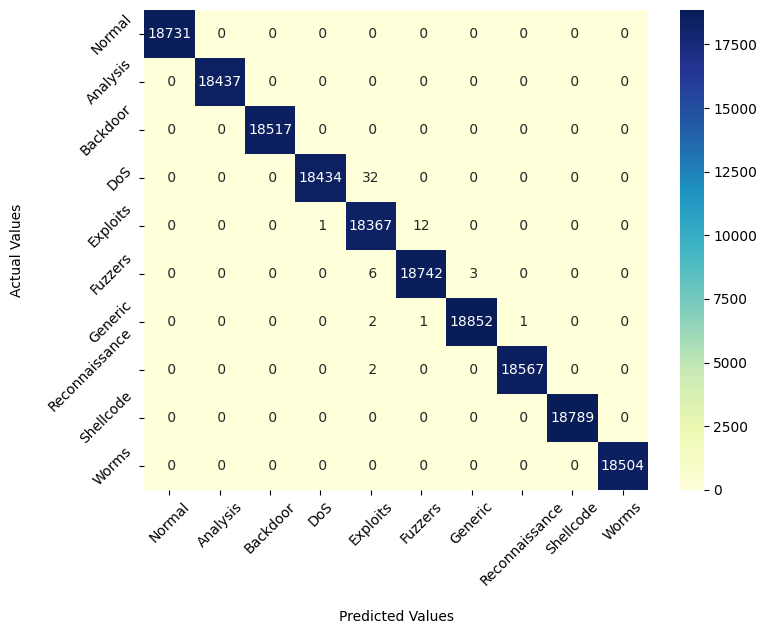

In [28]:
print("Confusion Matrix of BiLSTM")
conf_mat(y_test_classes, y_pred_classes) # Pass both y_test_classes and y_pred_classes to conf_mat